In [1]:
#imports

from __future__ import unicode_literals, print_function
import cv2
import pytesseract
import matplotlib.pyplot as plt
import spacy
import plac
import random
from pathlib import Path
from tqdm import tqdm
import fileinput

In [3]:
#function defintion for recognising hand written text
def ocr(path):
    sent = " "
    pytesseract.pytesseract.tesseract_cmd = 'C:\\Users\\Sivaraman\\AppData\Local\\Tesseract-OCR\\tesseract.exe'
    img = cv2.imread(path) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)  
    
#     plt.imshow(gray)
#     plt.imshow(thresh1)
#     plt.imshow(dilation)
#     im2 = img.copy() 
    # file = open("C:\\Users\\Sivaraman\\Desktop\\op1.txt", "w+") 
    # file.write("") 
    # file.close() 
    c=0
    im2 = img.copy()
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
        cropped = im2[y:y + h, x:x + w] 
#         plt.imshow(cropped)
#         plt.show()
        #file = open("C:\\Users\\Sivaraman\\Desktop\\op1.txt", "a") 
        text = pytesseract.image_to_string(cropped) 
        sent = sent + text
        c= c +1
        #plt.imshow(cropped)
        # Appending the text into file 
    #     file.write(text) 
    #     file.write("\n") 

    #     file.close
    f,ax = plt.subplots(2,2,figsize=(10,10))
    ax[0,0].imshow(gray)
    ax[0,1].imshow(thresh1)
    ax[1,0].imshow(dilation)
    ax[1,1].imshow(cropped)
    plt.show()
    n_sent = " "
    for w in sent:
        if w!='\n':
            n_sent = n_sent + w
    n_sent.strip()
    n_sent.lstrip()
    n_sent.rstrip()
    return n_sent

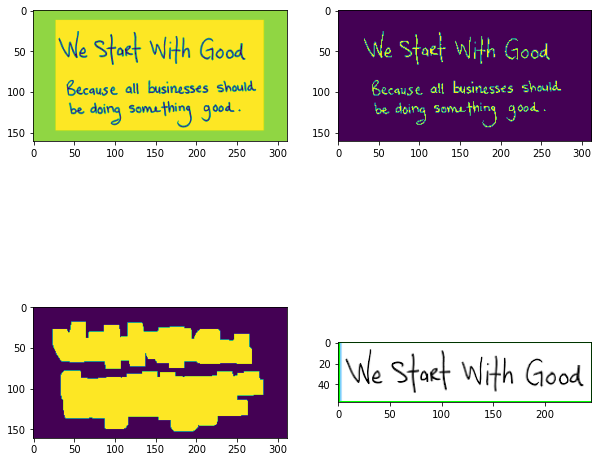

  Because all businesses should. be. daing Somathing good\We Stoel With Good 


In [3]:
#function call for ocr

path = "E:\\Datasets\\ocr\\i9.png"    
text = ocr(path)
print(text)

In [17]:
#invoking spacy lib for NER

nlp = spacy.load('en_core_web_sm') 
text = "My name is Surya and my nric no is 98787665A and my partner is Steve his nric is 56765423E"
doc = nlp1(text)
name = []
nric = []
for ent in doc.ents:
    if ent.label_ == "DATE" and len(ent.text)==9:
        nric.append(ent.text)
    if ent.label_ == "PERSON":
        name.append(ent.text)
        
    print(ent.text , ent.label_)

Surya PERSON
98787665A DATE
Steve PERSON
56765423E DATE


In [62]:
def ner(text):
    nlp = spacy.load('en_core_web_sm') 
    doc = nlp(text)
    name = []
    nric = []
    for ent in doc.ents:
        if ent.label_ == "DATE" and len(ent.text)==9:
            nric.append(ent.text)
        if ent.label_ == "PERSON":
            name.append(ent.text)

        print(ent.text , ent.label_)
    return [name,nric]

In [63]:
name = []
nric = []
op= ner("My name is Surya and my nric is 67812345A")
name = op[0]
nric = op[1]

Surya PERSON
67812345A DATE


In [66]:
nric

['67812345A']

In [83]:
with open("C:\\Users\\Sivaraman\\Desktop\\extract.txt" , "r+") as ext:
    text = ""
    for line in ext:
#         for word in line.split():
#             print(word)
        text = text+line.strip()
#print(text)
ext.close()
op = ner(text)
name = op[0]
nric = op[1]

Surya PERSON
98787665A DATE
Ram ORG
56765423EMy ORG
Surya ORG
98787665A DATE
Ram ORG
56765423EMy ORG
Surya ORG
98787665A DATE
Ram ORG
56765423EMy ORG
Surya ORG
98787665A DATE
Ram ORG


In [144]:
with open("C:\\Users\\Sivaraman\\Desktop\\fll.txt","rb+") as fil:
    n = 0
    r = 0
    for line in fil:
        for word in line.split():
            if word=="name:":
                print(word)
                fil.tell()
                print(p)
                fil.seek(p)
                #fil.write("surya \n")
fil.close()

In [101]:
fil.close()

In [30]:
ext.close()

In [102]:
#training_data for custom NER

TRAIN_DATA = [('My name is Ram and NRIC number is 98745637A', {'entities': [(34, 43, 'NRIC'), (11, 14, 'NAME')]}), ('My name is Kumar and NRIC number is 34567823B', {'entities': [(36, 45, 'NRIC'), (10, 16, 'NAME')]}), ('74540191Y', {'entities': [(0, 9, 'NRIC')]}), ('67841195X', {'entities': [(0, 9, 'NRIC')]}), ('89039955H', {'entities': [(0, 9, 'NRIC')]}), ('50137377U', {'entities': [(0, 9, 'NRIC')]}), ('35815108S', {'entities': [(0, 9, 'NRIC')]}), ('44625817v', {'entities': [(0, 9, 'NRIC')]}), ('40358467D', {'entities': [(0, 9, 'NRIC')]}), ('93636474I', {'entities': [(0, 9, 'NRIC')]}), ('13532259S', {'entities': [(0, 9, 'NRIC')]}), ('83193220p', {'entities': [(0, 9, 'NRIC')]}), ('73007723W', {'entities': [(0, 9, 'NRIC')]}), ('16914388f', {'entities': [(0, 9, 'NRIC')]}), ('33653895z', {'entities': [(0, 9, 'NRIC')]}), ('43996433Z', {'entities': [(0, 9, 'NRIC')]}), ('91163712T', {'entities': [(0, 9, 'NRIC')]}), ('18020318b', {'entities': [(0, 9, 'NRIC')]}), ('52517314r', {'entities': [(0, 9, 'NRIC')]}), ('73239802u', {'entities': [(0, 9, 'NRIC')]}), ('56962744J', {'entities': [(0, 9, 'NRIC')]}), ('81113293n', {'entities': [(0, 9, 'NRIC')]})]

In [105]:
model = None
output_dir=Path("C:\\Users\\Sivaraman\\Desktop\\Py_projects\\spacy_models")
n_iter=5

In [106]:
if model is not None:
    nlp = spacy.load(model)  
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.load('en_core_web_sm')   
    print("Created blank 'en' model")

#set up the pipeline

if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

Created blank 'en' model


In [107]:
for _, annotations in TRAIN_DATA:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        for text, annotations in tqdm(TRAIN_DATA):
            nlp.update(
                [text],  
                [annotations],  
                drop=0.5,  
                sgd=optimizer,
                losses=losses)
        print(losses,itn)

  0%|                                                                                           | 0/22 [00:00<?, ?it/s]

{'ner': 50.67091002900329} 0


  0%|                                                                                           | 0/22 [00:00<?, ?it/s]

{'ner': 60.469640688771506} 1


  0%|                                                                                           | 0/22 [00:00<?, ?it/s]

{'ner': 52.77110815186825} 2


  0%|                                                                                           | 0/22 [00:00<?, ?it/s]

{'ner': 37.73631814554665} 3


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:04<00:00,  4.77it/s]

{'ner': 40.599608973248905} 4


In [121]:
for text, _ in TRAIN_DATA:
    doc = nlp1(text)
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])

Entities [('Kumar', 'ORG'), ('NRIC', 'ORG'), ('34567823B', 'CARDINAL')]
Entities [('33653895z', 'DATE')]
Entities []
Entities [('52517314r', 'DATE')]
Entities []
Entities []
Entities [('18020318b', 'DATE')]
Entities [('13532259S', 'CARDINAL')]
Entities [('16914388f', 'DATE')]
Entities []
Entities [('50137377U', 'CARDINAL')]
Entities [('40358467D', 'CARDINAL')]
Entities []
Entities [('73239802u', 'PERSON')]
Entities [('44625817v', 'DATE')]
Entities []
Entities [('93636474I', 'CARDINAL')]
Entities [('43996433Z', 'CARDINAL')]
Entities [('91163712', 'DATE')]
Entities [('56962744J', 'CARDINAL')]
Entities []
Entities [('Ram', 'ORG'), ('NRIC', 'ORG'), ('98745637A', 'CARDINAL')]


In [127]:
doc = nlp1("My name is Surya and my nric no is 98787665A and my partner is Kumar his nric is 56765423E")
for ent in doc.ents:
    
    print(ent.text,)

Surya PERSON


NotImplementedError: [E129] Cannot write the label of an existing Span object because a Span is a read-only view of the underlying Token objects stored in the Doc. Instead, create a new Span object and specify the `label` keyword argument, for example:
from spacy.tokens import Span
span = Span(doc, start=9, end=10, label='NRIC')

In [62]:
#NRIC generator

import random
alp = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
for i in range(20):
    n = str(random.randint(10000000,99999999))+random.choice(alp)
    print(n)

74540191Y
67841195X
89039955H
50137377U
35815108S
44625817v
40358467D
93636474I
13532259S
83193220p
73007723W
16914388f
33653895z
43996433Z
91163712T
18020318b
52517314r
73239802u
56962744J
81113293n
